# Meme Kanseri Türü Tespiti İçin Makine Öğrenmesi Kullanımı

## Veri Setine Genel Bakış

In [175]:
import pandas as pd
import numpy as np

In [176]:
df=pd.read_csv("tumor.csv")
print(df.head())

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1       

In [177]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(11)
memory usage: 58.8 KB
None


## Veri Hazırlık Aşaması


In [178]:
# veri setinde 683 veri bulunmakta ve kayıp veri bulunmamakta
# Veri setinde benign ve malignant sınıflarının int türünde olduğu görülmekte bu yüzden dönüşüm işlemi yapılamsına ihtiyaç yok
#Veri setinde benign için 2 ve malignant için 4 değerleri kullanılmakta  bu değerler 0 ve 1 ile değiştirilmeli
# veri setinde gerek duyulmayan "Sample code number"  adında sütun bulunmakta , bu sütun silinmeli

In [179]:
df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [180]:
df.drop(["Sample code number"],axis=1,inplace = True)

df.Class = [1 if each == 4 else 0 for each in df.Class]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10)
memory usage: 53.4 KB
None


In [181]:
print(df["Class"].head(10))

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: Class, dtype: int64


In [182]:
df.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [183]:
# veri setinde obje türünde veri yok

In [184]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [185]:
# bütün veriler 1-10 arasında değişmekte aşırı veri bulunmamakta

## MLPC Uygulaması

In [186]:
y=df.Class.values
x_data=df.drop(["Class"],axis=1).values

In [187]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [188]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

mlpc_params={"activation":["relu","logistic","tanh","identity"],
             "alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(10,10),(3,3,3),(100,100),(3,5,3)],
            "solver":["lbfgs","adam","sgd"]}

mlpc=MLPClassifier(random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1037 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1482 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  4.9min finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

In [190]:
print(mlpc_cv_model.best_params_)

{'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (3, 3, 3), 'solver': 'adam'}


In [191]:
mlpc_tuned=MLPClassifier(activation="tanh",alpha=0.1,hidden_layer_sizes=(3,3,3),solver="adam").fit(x_train,y_train)
print("score:",mlpc_tuned.score(x_test,y_test))

score: 1.0


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [192]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

scores=[]

kf=KFold(n_splits=10,random_state=1)
mlpc=MLPClassifier(activation="relu",alpha=0.001,hidden_layer_sizes=(3,5,3),solver="lbfgs")

for train_indexler,test_indexler in kf.split(x):
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)
    print(score)
    
print("ortalama score:",np.mean(scores))

0.5072463768115942
0.9710144927536232
0.9710144927536232
0.9411764705882353
0.9558823529411765
0.9852941176470589
0.9558823529411765
0.9705882352941176
0.9852941176470589
0.8088235294117647
ortalama score: 0.905221653878943


## Değerlendirme

In [193]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [194]:
y_pred=mlpc.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.656934306569343


In [195]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        90
           1       0.00      0.00      0.00        47

   micro avg       0.66      0.66      0.66       137
   macro avg       0.33      0.50      0.40       137
weighted avg       0.43      0.66      0.52       137



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [196]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[90  0]
 [47  0]]


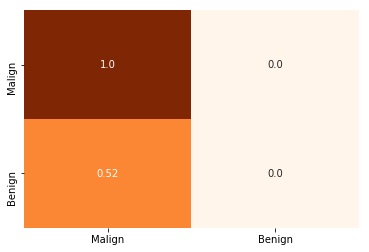

In [199]:
class_adlari=["Malign","Benign"]
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Oranges",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2")



In [200]:
import sklearn.metrics as metrics
f1=metrics.f1_score(y_test,y_pred)
print("f1 score:",f1)

f1 score: 0.0


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [201]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        90
           1       0.00      0.00      0.00        47

   micro avg       0.66      0.66      0.66       137
   macro avg       0.33      0.50      0.40       137
weighted avg       0.43      0.66      0.52       137



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [202]:
#roc ve auc eğrileri
probs=mlpc.predict_proba(x_test)
#print(probs)
probs=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,probs)
auc_value=metrics.auc(fpr,tpr)

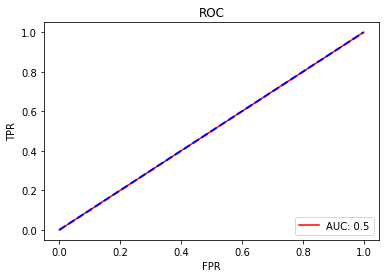

In [203]:
plt.title("ROC")
plt.plot(fpr,tpr,label="AUC: "+str(round(auc_value,2)),color="red")
plt.plot([0,1],[0,1],color="blue",lw=2,linestyle="--")
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

## Keras İle Uygulama

In [112]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,MaxPool2D,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [113]:
y=df.Class.values
x=df.drop(["Class"],axis=1).values

In [114]:
print(y.shape)

(683,)


In [115]:
x_train, x_test,y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [116]:
print(x_train.shape)
print(y_train.shape)

(546, 9)
(546,)


In [126]:
input_shape=x_train[0].shape

In [172]:
model=Sequential()
model.add(Dense(15,activation="relu",input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(30,activation="relu",input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(60,activation="relu",input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(120,activation="relu",input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(240,activation="relu",input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(9,activation="softmax"))


In [173]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [174]:
egitim=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Train on 546 samples, validate on 137 samples
Epoch 1/10
546/546 [==============================] - 5s - loss: 2.0755 - acc: 0.3590 - val_loss: 1.7521 - val_acc: 0.6496
Epoch 2/10
546/546 [==============================] - 0s - loss: 1.0582 - acc: 0.7637 - val_loss: 1.2437 - val_acc: 0.9270
Epoch 3/10
546/546 [==============================] - 0s - loss: 0.6988 - acc: 0.8388 - val_loss: 0.7957 - val_acc: 0.9635
Epoch 4/10
546/546 [==============================] - 0s - loss: 0.5798 - acc: 0.8864 - val_loss: 0.5034 - val_acc: 0.9854
Epoch 5/10
546/546 [==============================] - 0s - loss: 0.4217 - acc: 0.9286 - val_loss: 0.3308 - val_acc: 0.9927
Epoch 6/10
546/546 [==============================] - 0s - loss: 0.3835 - acc: 0.9249 - val_loss: 0.2355 - val_acc: 0.9927
Epoch 7/10
546/546 [==============================] - 0s - loss: 0.3899 - acc: 0.9267 - val_loss: 0.1658 - val_acc: 0.9927
Epoch 8/10
546/546 [==============================] - 0s - loss: 0.3870 - acc: 0.9304 - val_l

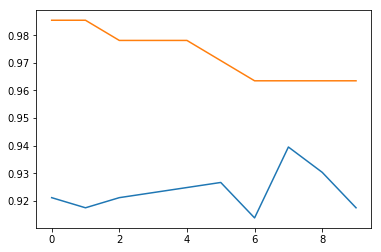

In [167]:
plt.plot(egitim.history["acc"])
plt.plot(egitim.history["val_acc"])
plt.show()

In [168]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)
cm=metrics.confusion_matrix(y_true,y_pred)
print(cm)

AxisError: axis 1 is out of bounds for array of dimension 1